In [54]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve,confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
import xgboost as xgb
from scipy import stats
import pickle
import imblearn.over_sampling
import warnings
from mlxtend.classifier import StackingClassifier
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
%pylab inline
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pd.set_option('display.max_columns',None)

## First Importing the Data

In [3]:
Data1 = pd.read_csv('census-income.data',names = ['age','class_worker','Industry_code','occupation_code','education',
                                            'wage_per_hour','hs_college','marital_status','major_ind_code','major_occ_code','Race',
                                            'hisp_origin','sex','union_member','unemp_reason',
                                                  'full_or_part_emp','capital_gains','capital_losses',
                                                  'stock_dividends','tax_filer_stat','region_prev_res','state_prev_res',
                                                  'det_hh_fam_stat','det_hh_summ',
                                                  'Adj_grss_income','mig_chg_msa','mig_chg_reg','mig_move_reg','mig_same',
                                                  'mig_prev_sunbelt','num_emp','fam_under_18','country_father',
                                                  'country_mother','country_self','citizenship','own_or_self',
                                                  "vet_question",'vet_benefits','weeks_worked','year','income_50k'])

In [4]:
Data2 = pd.read_csv('census-income.test',names =  ['age','class_worker','Industry_code','occupation_code','education',
                                            'wage_per_hour','hs_college','marital_status','major_ind_code','major_occ_code','Race',
                                            'hisp_origin','sex','union_member','unemp_reason',
                                                  'full_or_part_emp','capital_gains','capital_losses',
                                                  'stock_dividends','tax_filer_stat','region_prev_res','state_prev_res',
                                                  'det_hh_fam_stat','det_hh_summ',
                                                  'Adj_grss_income','mig_chg_msa','mig_chg_reg','mig_move_reg','mig_same',
                                                  'mig_prev_sunbelt','num_emp','fam_under_18','country_father',
                                                  'country_mother','country_self','citizenship','own_or_self',
                                                  "vet_question",'vet_benefits','weeks_worked','year','income_50k'])

In [5]:
Data_Concat = [Data1,Data2]
Data_all = pd.concat(Data_Concat, ignore_index=True)

#### The target is to predict whether annual income more than 50k or less than 50k. so here traget column is being replced to binary form(0,1)


In [6]:
def get_binary():
    
    if Data_all["income_50k"] == '- 50000.':
        binary = 0
    elif Data_all['- 50000.'] == '50000+.':
        binary = 1
    return binary

In [7]:
Data_all['income_50k'] = Data_all['income_50k'].str.strip()
Data_all['income'] = Data_all['income_50k'].apply(lambda x: 0 if x == '- 50000.' else 1)
Data_all.drop('income_50k', axis =1, inplace = True)

In [78]:
Date_Baseline_X = Data_all[['age','class_worker','Industry_code','occupation_code','education',
                                            'wage_per_hour','hs_college','marital_status','major_ind_code','major_occ_code','Race',
                                            'hisp_origin','sex','union_member','unemp_reason',
                                                  'full_or_part_emp','capital_gains','capital_losses',
                                                  'stock_dividends','tax_filer_stat','region_prev_res','state_prev_res',
                                                  'det_hh_fam_stat','det_hh_summ',
                                                  'Adj_grss_income','mig_chg_msa','mig_chg_reg','mig_move_reg','mig_same',
                                                  'mig_prev_sunbelt','num_emp','fam_under_18','country_father',
                                                  'country_mother','country_self','citizenship',
                                                  "vet_question",'vet_benefits','weeks_worked','year']]
Date_Baseline_y = Data_all[['income']]

In [79]:
Date_Baseline = pd.get_dummies(Date_Baseline_X, columns =['class_worker','education','hs_college','marital_status','major_ind_code','major_occ_code','Race',
                                            'hisp_origin','sex','union_member','unemp_reason',
                                                  'full_or_part_emp','tax_filer_stat','region_prev_res','state_prev_res',
                                                  'det_hh_fam_stat','det_hh_summ',
                                                  'mig_chg_msa','mig_chg_reg','mig_move_reg','mig_same',
                                                  'mig_prev_sunbelt','fam_under_18','country_father',
                                                  'country_mother','country_self','citizenship',
                                                  "vet_question"], drop_first=True)

In [80]:
X_train_B, X_val_B, y_train_B,y_val_B = train_test_split(Date_Baseline,Date_Baseline_y,test_size =.04,random_state=42)

# Baseline

#### This is the basleline model results using KNeighbors Classifier. It shows there is an overfit, also show a bad F1 score

In [81]:
kNN_B = KNeighborsClassifier(n_neighbors=3)
kNN_B.fit(X_train_B,y_train_B)
print(f'Traing score: {kNN_B.score(X_train_B,y_train_B)}')
print(f'Val score:    {kNN_B.score(X_val_B,y_val_B)}')
print( f"F1 score:    {f1_score(kNN_B.predict(X_val_B),y_val_B)}")
print(f'Precision score: {precision_score(y_val_B,kNN_B.predict(X_val_B))}')
print(f'Recall score: {recall_score(y_val_B,kNN_B.predict(X_val_B))}')
print(f'accuracy score: {accuracy_score(y_val_B, kNN_B.predict(X_val_B))}')

Traing score: 0.9617211890864666
Val score:    0.9377714667557634
F1 score:    0.3918367346938776
Precision score: 0.4819277108433735
Recall score: 0.33012379642365886
accuracy score: 0.9377714667557634


In [ ]:
Save_kNN_B = open('Knn_baseline.pickle','wb') 
pickle.dump(kNN_B,Save_kNN_B)
Save_kNN_B.close()

# EDA

#### To try to improve our score we need to do EDAs and remove some columns 

In [8]:
Data = Data_all[['age','class_worker','Industry_code','occupation_code','education','wage_per_hour','hs_college','marital_status',
               'major_ind_code','major_occ_code','Race','hisp_origin','sex','unemp_reason','full_or_part_emp','tax_filer_stat',
              'det_hh_fam_stat','det_hh_summ','Adj_grss_income','fam_under_18','country_self','citizenship','own_or_self','weeks_worked',
               'capital_gains','stock_dividends','income']]

In [9]:
Data['country_self'] = Data['country_self'].str.strip()
Data['country_self'] = Data['country_self'].replace('?',np.nan)

In [10]:
Data['det_hh_fam_stat']=Data['det_hh_fam_stat'].str.replace('<','_under_')

In [11]:
Data.dropna(inplace = True);

In [12]:
Data.drop_duplicates(inplace = True , ignore_index = True)

In [45]:
Data.corr()

,age,Industry_code,occupation_code,wage_per_hour,Adj_grss_income,own_or_self,weeks_worked,capital_gains,stock_dividends,income
age,1.000000,-0.033193,-0.054577,-0.011997,-0.016957,-0.071020,-0.012516,0.035071,0.106566,0.080369
Industry_code,-0.033193,1.000000,0.554637,0.162535,0.027449,0.250469,0.748077,0.064819,0.011659,0.191044
occupation_code,-0.054577,0.554637,1.000000,0.193466,0.026054,0.226386,0.649144,0.002996,-0.029571,0.008771
wage_per_hour,-0.011997,0.162535,0.193466,1.000000,0.014022,0.054681,0.193756,0.001487,-0.007525,0.021455
Adj_grss_income,-0.016957,0.027449,0.026054,0.014022,1.000000,0.013857,0.027045,0.004001,-0.000644,0.011745
own_or_self,-0.071020,0.250469,0.226386,0.054681,0.013857,1.000000,0.263277,0.014840,-0.005714,0.039467
weeks_worked,-0.012516,0.748077,0.649144,0.193756,0.027045,0.263277,1.000000,0.082536,0.011237,0.258169
capital_gains,0.035071,0.064819,0.002996,0.001487,0.004001,0.014840,0.082536,1.000000,0.121611,0.240241
stock_dividends,0.106566,0.011659,-0.029571,-0.007525,-0.000644,-0.005714,0.011237,0.121611,1.000000,0.178457
income,0.080369,0.191044,0.008771,0.021455,0.011745,0.039467,0.258169,0.240241,0.178457,1.000000


In [84]:
Data

,age,class_worker,Industry_code,occupation_code,education,wage_per_hour,hs_college,marital_status,major_ind_code,major_occ_code,Race,hisp_origin,sex,unemp_reason,full_or_part_emp,tax_filer_stat,det_hh_fam_stat,det_hh_summ,Adj_grss_income,fam_under_18,country_self,citizenship,own_or_self,weeks_worked,capital_gains,stock_dividends,income
0,5329,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Not in labor force,Nonfiler,Other Rel 18+ ever marr not in subfamily,Other relative of householder,1700.09,Not in universe,United-States,Native- Born in the United States,0,0,0,0,0
1,3364,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,White,All other,Male,Not in universe,Children or Armed Forces,Head of household,Householder,Householder,1053.55,Not in universe,United-States,Native- Born in the United States,0,52,0,0,0
2,324,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,All other,Female,Not in universe,Not in labor force,Nonfiler,Child 18+ never marr Not in a subfamily,Child 18 or older,991.95,Not in universe,Vietnam,Foreign born- Not a citizen of U S,0,0,0,0,0
3,81,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Children or Armed Forces,Nonfiler,Child _under_18 never marr not in subfamily,Child under 18 never married,1758.14,Both parents present,United-States,Native- Born in the United States,0,0,0,0,0
4,100,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,Children or Armed Forces,Nonfiler,Child _under_18 never marr not in subfamily,Child under 18 never married,1069.16,Both parents present,United-States,Native- Born in the United States,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285568,16,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,White,Mexican-American,Male,Not in universe,Children or Armed Forces,Nonfiler,Child _under_18 never marr not in subfamily,Child under 18 never married,1335.91,Both parents present,United-States,Native- Born in the United States,0,0,0,0,0
285569,3721,Private,8,36,11th grade,0,Not in universe,Separated,Manufacturing-durable goods,Machine operators assmblrs & inspctrs,Black,All other,Male,Not in universe,Full-time schedules,Single,Nonfamily householder,Householder,2511.11,Not in universe,United-States,Native- Born in the United States,0,52,0,0,0
285570,576,Self-employed-not incorporated,1,43,7th and 8th grade,0,Not in universe,Married-civilian spouse present,Agriculture,Farming forestry and fishing,White,Mexican (Mexicano),Male,Not in universe,Children or Armed Forces,Joint both under 65,Spouse of RP of unrelated subfamily,Nonrelative of householder,2083.76,Not in universe,Mexico,Foreign born- U S citizen by naturalization,0,52,0,0,0
285571,900,Private,45,2,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Other professional services,Executive admin and managerial,White,All other,Female,Not in universe,Full-time schedules,Joint both under 65,Spouse of householder,Spouse of householder,1680.06,Not in universe,United-States,Native- Born in the United States,0,52,0,0,0


In [ ]:
sns.pairplot(Data);

In [46]:
x = Data[['age','class_worker','Industry_code','occupation_code','education','wage_per_hour','hs_college','marital_status',
               'major_ind_code','major_occ_code','Race','hisp_origin','sex','unemp_reason','full_or_part_emp','tax_filer_stat',
              'det_hh_fam_stat','det_hh_summ','Adj_grss_income','fam_under_18','country_self','citizenship','own_or_self','weeks_worked','capital_gains','stock_dividends']]
y = Data[['income']]

#### removing spaces before or after values in rows

In [47]:
strips = ['class_worker','education','hs_college','marital_status',
               'major_ind_code','major_occ_code','Race','hisp_origin','sex','unemp_reason','full_or_part_emp','tax_filer_stat',
              'det_hh_fam_stat','det_hh_summ','fam_under_18','country_self','citizenship']

In [44]:
for strip in strips: 
    x[strip] = x[strip].str.strip()

# Building models

### Now lets start to build some models and check scores and compare between them after EDAs

#### converting categories into dummies

In [48]:
X = pd.get_dummies(x, columns =['class_worker', 'education','hs_college','marital_status','major_ind_code','Race','hisp_origin','sex','unemp_reason','full_or_part_emp','tax_filer_stat','det_hh_fam_stat','det_hh_summ','fam_under_18','country_self','citizenship','major_occ_code'], drop_first=True)

#### Split the data to training(92%), validation(4%), and testing(4%)

In [49]:
X_train, X_val, y_train,y_val = train_test_split(X,y,test_size =.04,random_state=42)
X_train, X_test, y_train,y_test = train_test_split(X_train,y_train,test_size =.041665,random_state=42)

#### The function takes any model and show scores of Training, Validation, F1, Precision, recall, and accuracy. 

In [18]:
def get_scores(model):
    model.fit(X_train,y_train)
    print(f'Traing score: {model.score(X_train,y_train)}')
    print(f'Val score:    {model.score(X_val,y_val)}')
    print( f"F1 score:    {f1_score(model.predict(X_val),y_val)}")
    print(f'Precision score: {precision_score(y_val,model.predict(X_val))}')
    print(f'Recall score: {recall_score(y_val,model.predict(X_val))}')
    print(f'accuracy score: {accuracy_score(y_val, model.predict(X_val))}')

### Let's Start with Logistic Regreesion model

In [23]:
LR = LogisticRegression(solver='liblinear')
get_scores(LR)

Traing score: 0.9501459690096564
Val score:    0.9465989669964108
F1 score:    0.46017699115044247
Precision score: 0.7471264367816092
Recall score: 0.33248081841432225
accuracy score: 0.9465989669964108


### Standard Scaler Logistic Rgression model

In [24]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_val_scaled = scale.fit_transform(X_val)
SLR = LogisticRegression(solver='liblinear')
SLR.fit(X_train_scaled, y_train)
y_predict = SLR.predict(X_train_scaled) 
print(f"Training: {SLR.score(X_train_scaled,y_train)}") 
print(f"val:      {SLR.score(X_val_scaled,y_val)}") 
print( f"F1 score: {f1_score(SLR.predict(X_val_scaled),y_val)}")
print(f'Precision score: {precision_score(y_val,SLR.predict(X_val_scaled))}')
print(f'Recall score: {recall_score(y_val,SLR.predict(X_val_scaled))}')
print(f'accuracy score: {accuracy_score(y_val, SLR.predict(X_val_scaled))}')

Training: 0.950789222272549
val:      0.9487875339227874
F1 score: 0.49871465295629824
Precision score: 0.7558441558441559
Recall score: 0.3721227621483376
accuracy score: 0.9487875339227874


### KNeighborsClassifier model

In [25]:
kNNC = KNeighborsClassifier(n_neighbors=10)
get_scores(kNNC)

Traing score: 0.9482085967563288
Val score:    0.9395955528320056
F1 score:    0.294478527607362
Precision score: 0.7346938775510204
Recall score: 0.18414322250639387
accuracy score: 0.9395955528320056


### DecisionTreeClassifier model

In [26]:
DTC = DecisionTreeClassifier()
get_scores(DTC)

Traing score: 0.9999923875353504
Val score:    0.9254136391490851
F1 score:    0.45384615384615384
Precision score: 0.455012853470437
Recall score: 0.45268542199488493
accuracy score: 0.9254136391490851


### ExtraTreesClassifier model

In [27]:
ETC =  ExtraTreesClassifier()
get_scores(ETC)

Traing score: 0.9999923875353504
Val score:    0.9450231988094195
F1 score:    0.4935483870967742
Precision score: 0.6681222707423581
Recall score: 0.391304347826087
accuracy score: 0.9450231988094195


### RandomForestClassifier model

In [28]:
RFC = RandomForestClassifier(n_estimators=10, random_state=1)
get_scores(RFC)

Traing score: 0.9944429008057794
Val score:    0.9479996498292917
F1 score:    0.4914383561643836
Precision score: 0.7435233160621761
Recall score: 0.3670076726342711
accuracy score: 0.9479996498292917


ROC AUC score =  0.8855092532839369


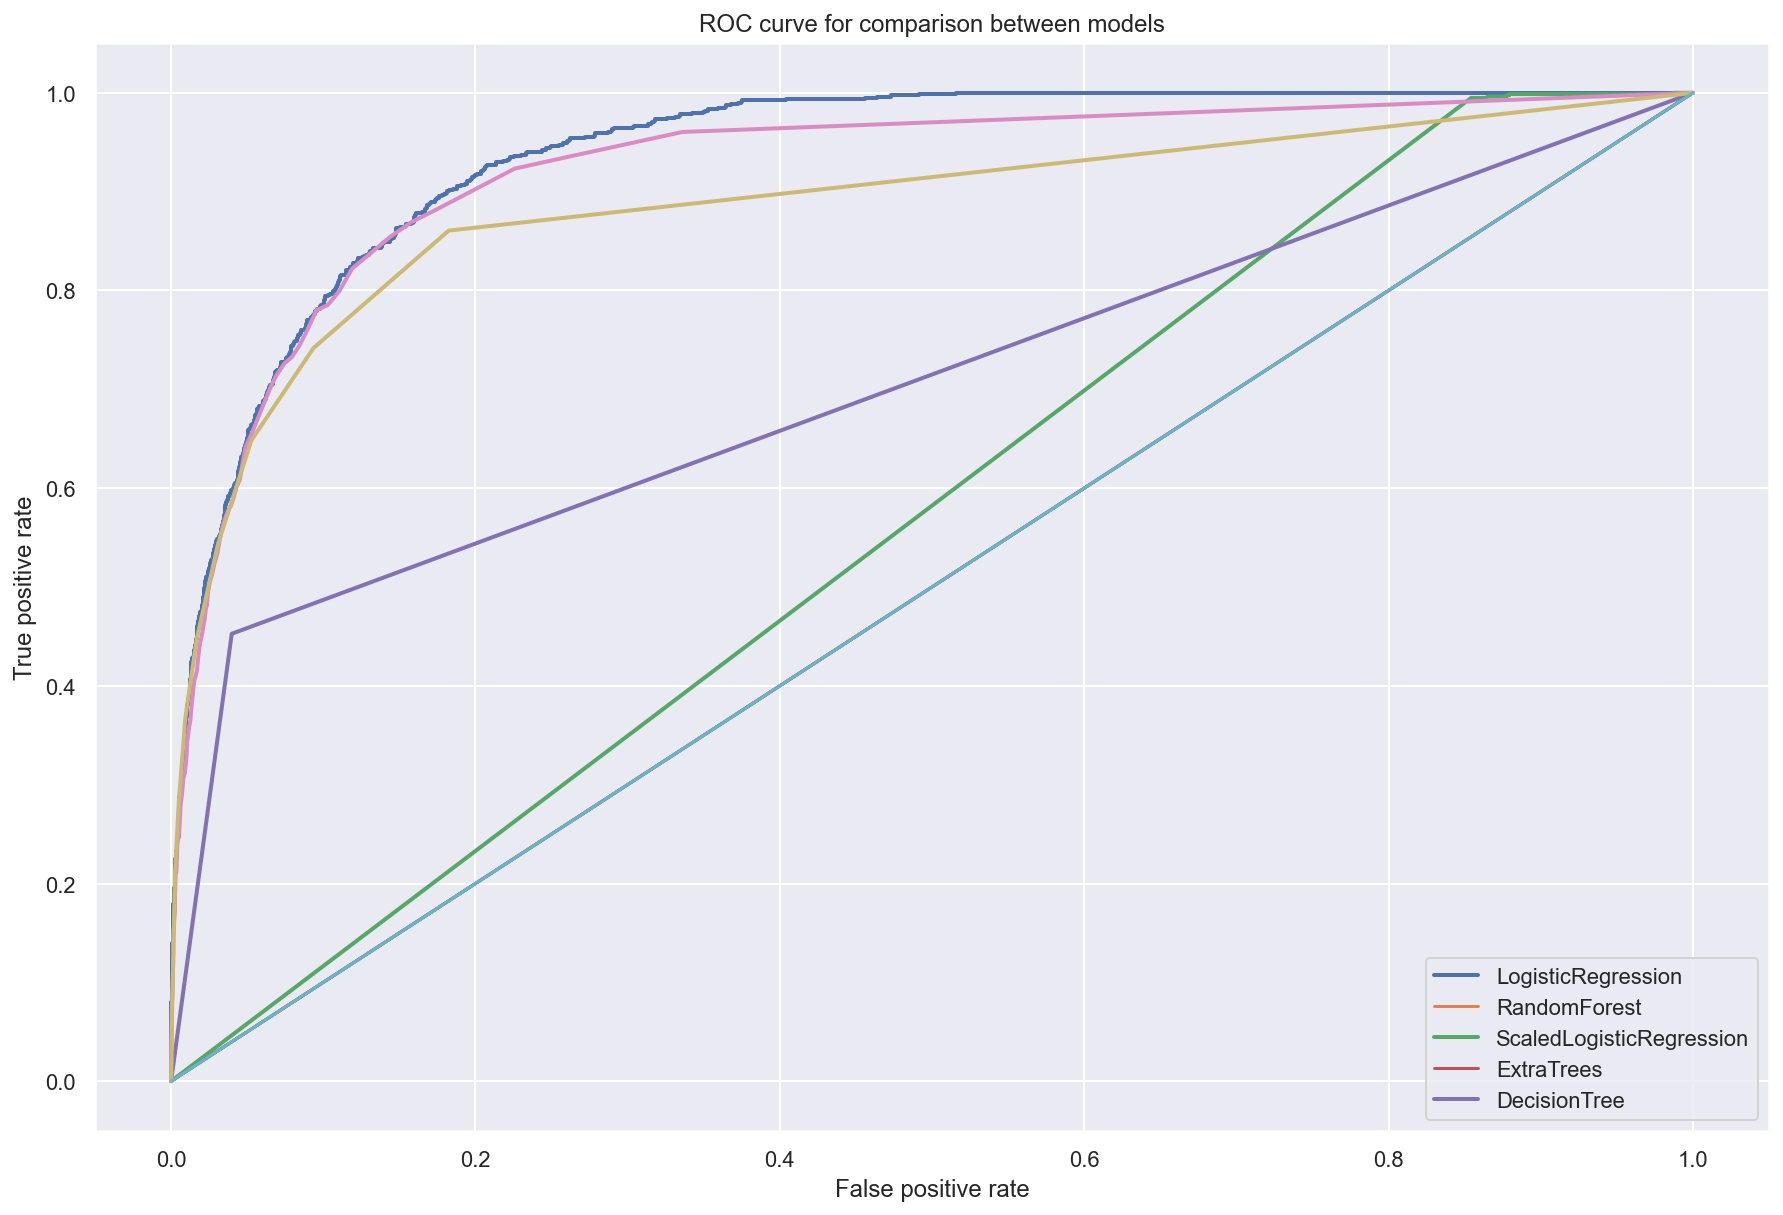

In [37]:
models = [LR,SLR,DTC,ETC,RFC]
names = ['LogisticRegression','RandomForest','ScaledLogisticRegression','ExtraTrees','DecisionTree']
roc_list(models,names)

# Balancing and Feature engineering

#### after we selected our model wich is Logistic Regression. Now we will try to improve our model scores by oversampling technique which helps to balance the data. after that will apply some feature engineering  


In [30]:
lr_3x = LogisticRegression(class_weight={1 : 3, 0 : 1}, solver='liblinear')
get_scores(lr_3x)


Traing score: 0.9391002828030617
Val score:    0.937406985905629
F1 score:    0.5648204503956178
Precision score: 0.5389082462253194
Recall score: 0.5933503836317136
accuracy score: 0.937406985905629


In [31]:
def age(age):
    get = age['age']**2
    return get
Data["age"] = Data.apply(age, axis=1)

## getting scores of LogisticRegression after balancing and feature engineering

In [50]:
lr_FN = LogisticRegression(class_weight={1 : 3, 0 : 1}, solver='liblinear')
get_scores(lr_FN)

Traing score: 0.9386511473887343
Val score:    0.9377571566138493
F1 score:    0.5672550213024955
Precision score: 0.5412311265969802
Recall score: 0.5959079283887468
accuracy score: 0.9377571566138493


Logistic Regression Model best F1 score 0.567 at prob decision threshold >= 0.503


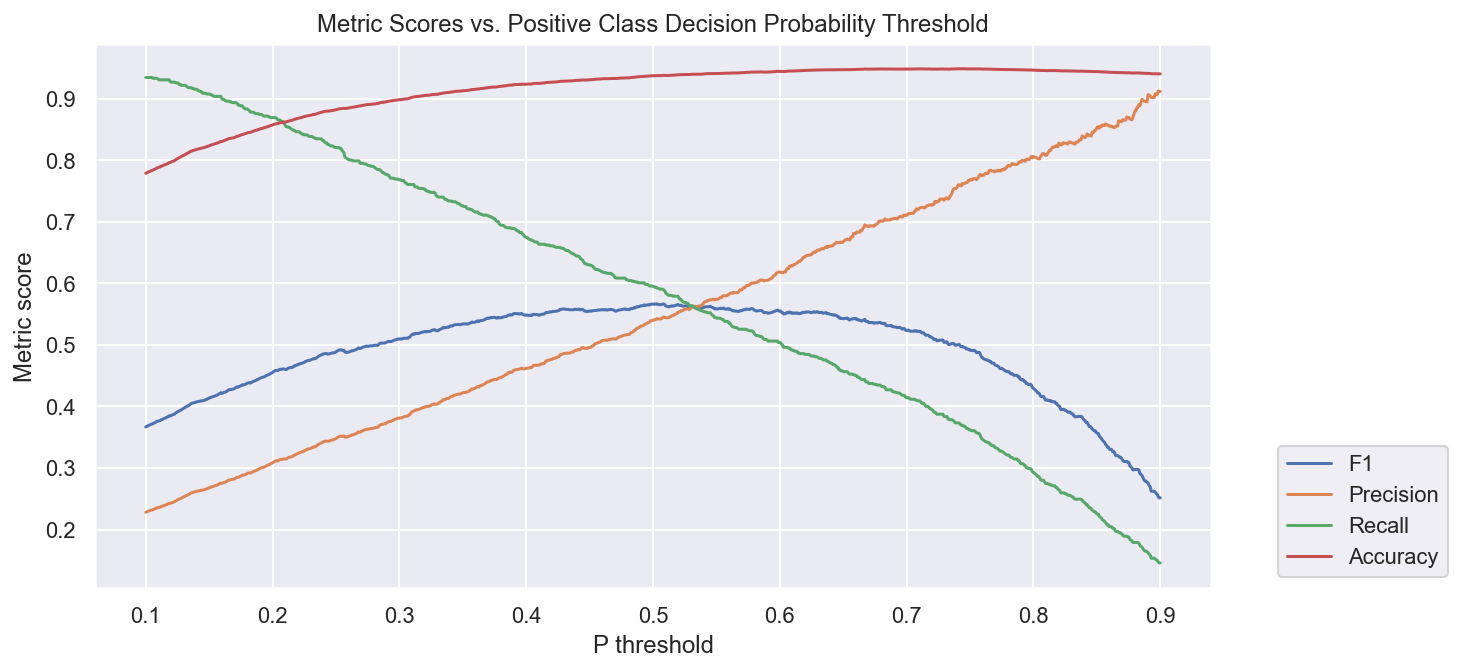

In [51]:
f1(lr_FN)

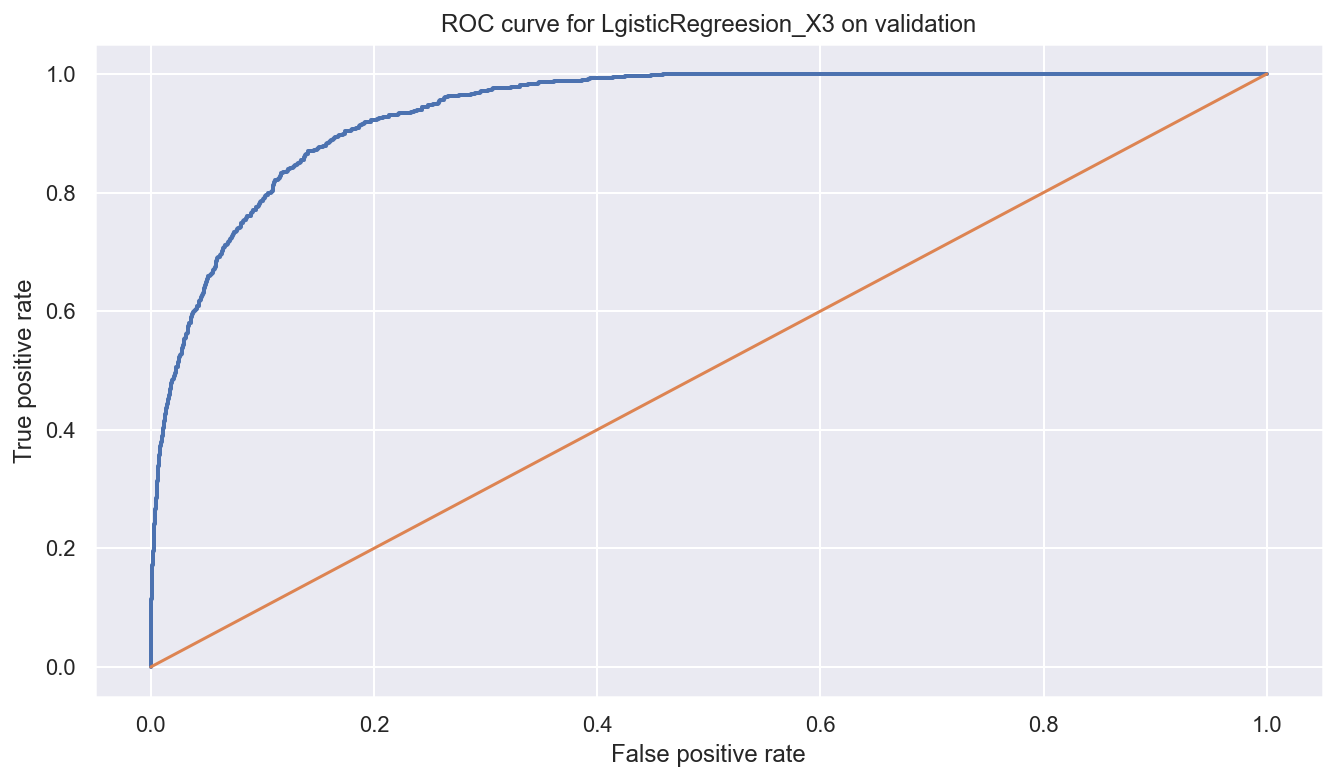

In [52]:
roc(lr_FN,'LgisticRegreesion_X3 on validation')

<Figure size 600x400 with 0 Axes>

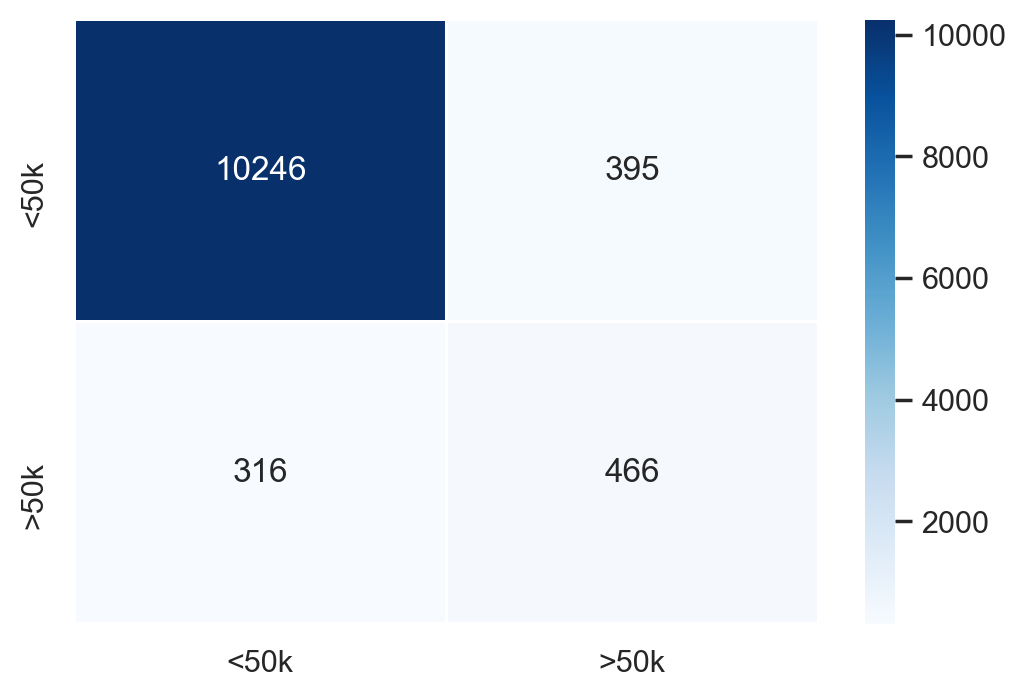

In [53]:
plt.figure(dpi=100)
heatm(lr_FN);

In [69]:
model_names = ["LR", "lr_3x",'kNNC']
model_vars = [LogisticRegression(solver='liblinear'),LogisticRegression(class_weight={1 : 3, 0 : 1}, solver='liblinear'),KNeighborsClassifier(n_neighbors=10)]

In [70]:
model_list = list(zip(model_names, model_vars))

In [71]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=LogisticRegression(), use_probas=False)

In [72]:
get_scores(stacked)

Traing score: 0.9518663860204699
Val score:    0.9498380460474481
F1 score:    0.5106746370623398
Precision score: 0.7686375321336761
Recall score: 0.38235294117647056
accuracy score: 0.9498380460474481


# Testing the model using testing data

now we selected the best model for our data. now we test with our test data. but first we need to combine our traing and validation data

In [90]:
Data_x = [X_train,X_val]
Data_y = [y_train,y_val]
X_train = pd.concat(Data_x, ignore_index=True)
y_train = pd.concat(Data_y, ignore_index=True)

In [91]:
lr_TE = LogisticRegression(class_weight={1 : 3, 0 : 1}, solver='liblinear')
lr_TE.fit(X_train,y_train)
print(f'Traing score: {lr_TE.score(X_train,y_train)}')
print(f'Test score:    {lr_TE.score(X_test,y_test)}')
print( f"F1 score:    {f1_score(lr_TE.predict(X_test),y_test)}")
print(f'Precision score: {precision_score(y_test,lr_TE.predict(X_test))}')
print(f'Recall score: {recall_score(y_test,lr_TE.predict(X_test))}')
print(f'accuracy score: {accuracy_score(y_test, lr_TE.predict(X_test))}')

Traing score: 0.9383476199161043
Test score:    0.9395955528320056
F1 score:    0.5442536327608982
Precision score: 0.5208596713021492
Recall score: 0.5698478561549101
accuracy score: 0.9395955528320056


Logistic Regression Model best F1 score 0.567 at prob decision threshold >= 0.512


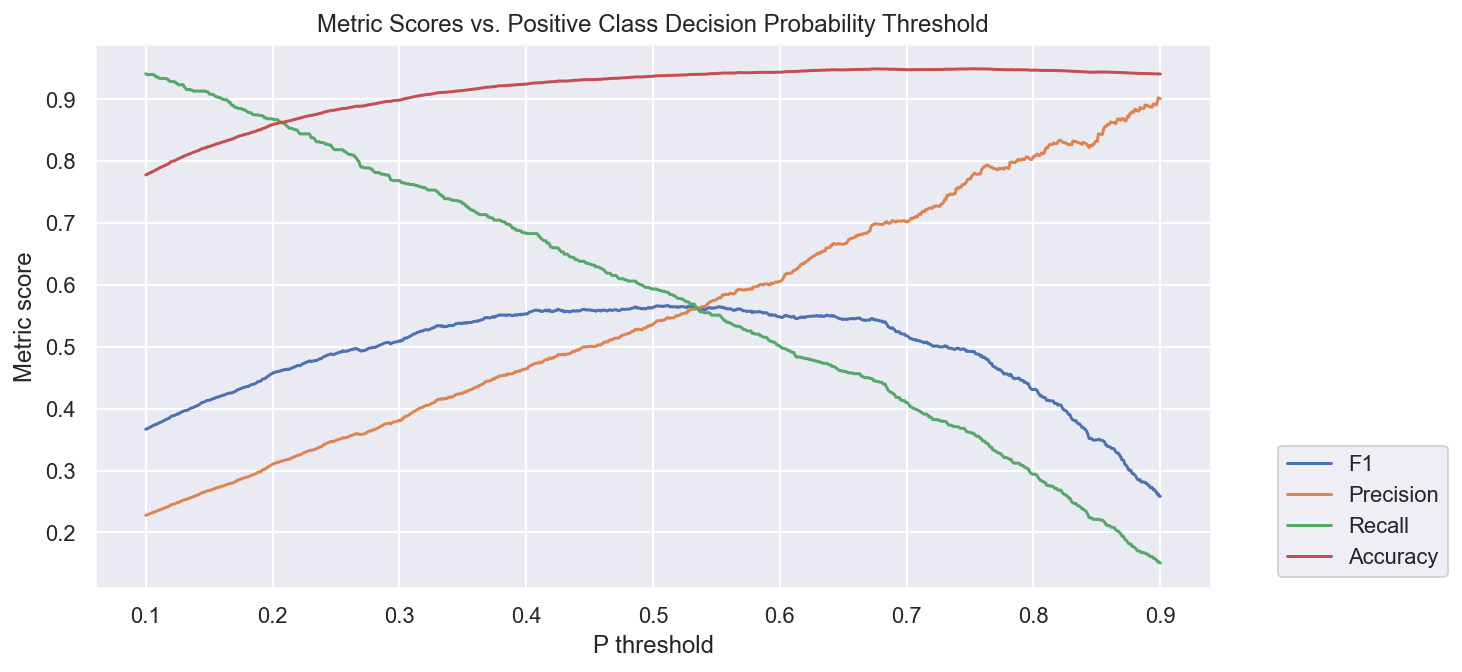

In [92]:
f1(lr_TE)

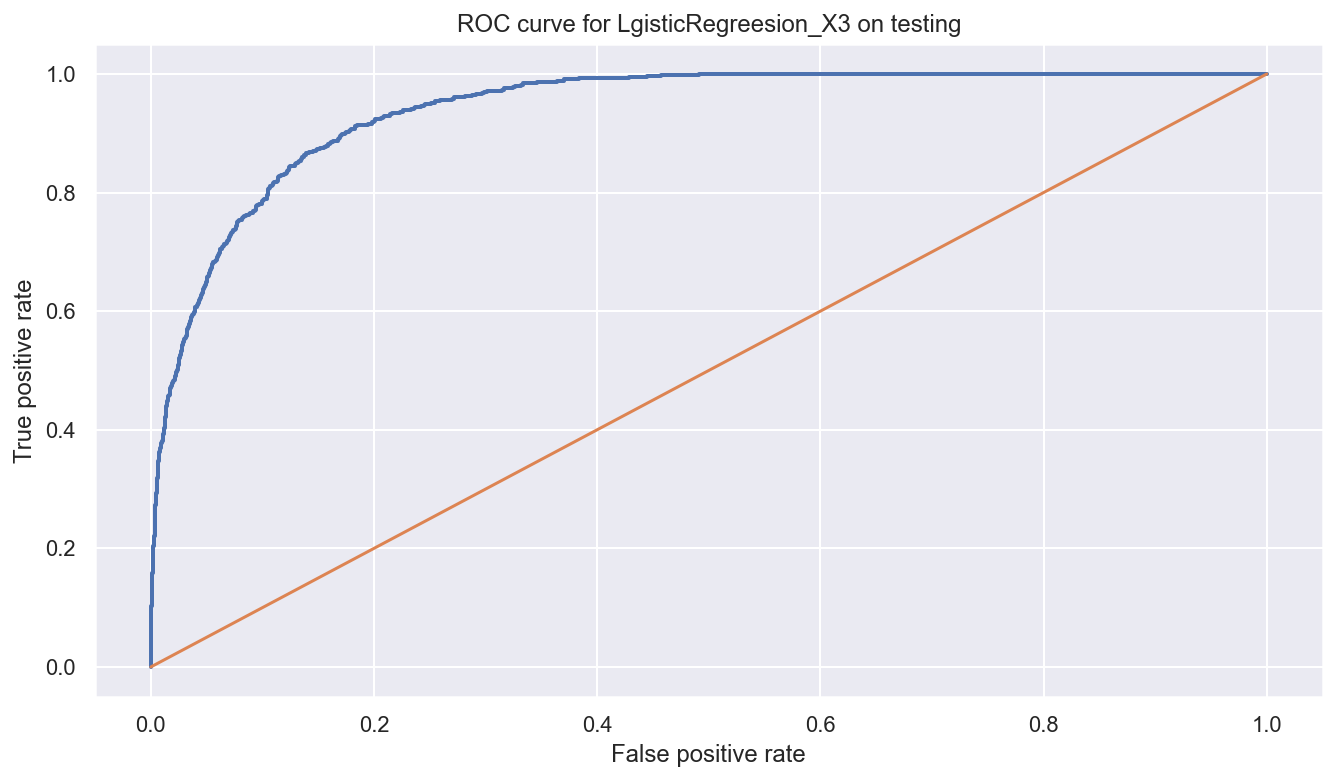

In [93]:
roc(lr_TE,'LgisticRegreesion_X3 on testing')

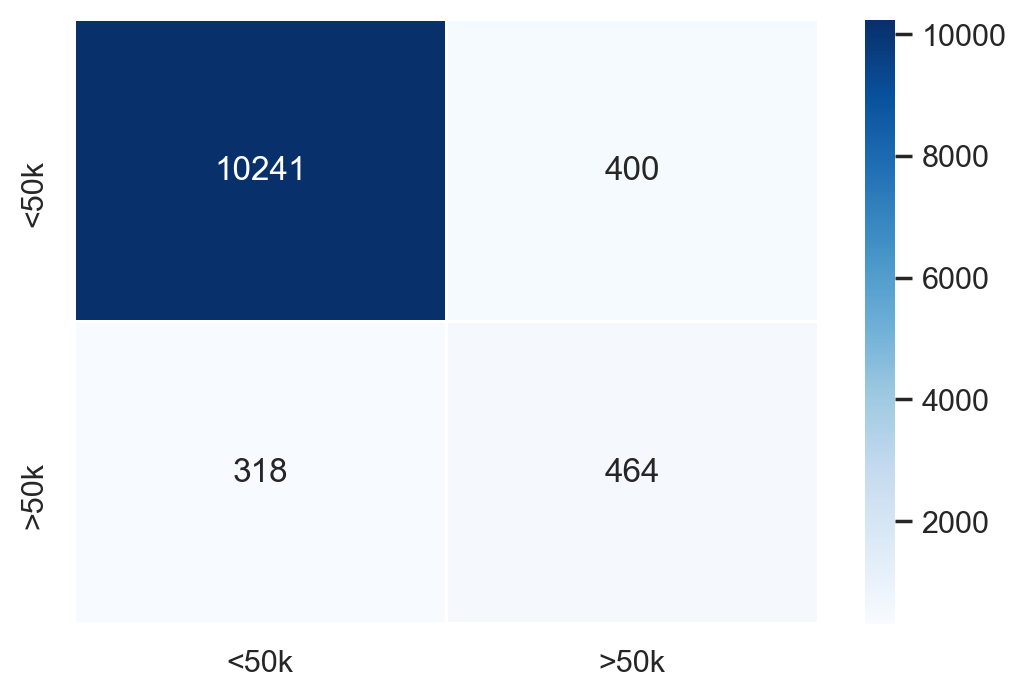

In [94]:
heatm(lr_TE)

In [ ]:
save_model= open('LogisticRegression.pcl','wb')
pickle.dump(lr_TE,save_model)
save_model.close()

# Drawing Functions:

In [19]:
def f1(model):
    sns.set()


    thresh_ps = np.linspace(.10,.90,1000)
    model_val_probs = model.predict_proba(X_val)[:,1]  

    f1_scores, prec_scores, rec_scores, acc_scores = [], [], [], []
    for p in thresh_ps:
        model_val_labels = model_val_probs >= p
        f1_scores.append(f1_score(y_val, model_val_labels))    
        prec_scores.append(precision_score(y_val, model_val_labels))
        rec_scores.append(recall_score(y_val, model_val_labels))
        acc_scores.append(accuracy_score(y_val, model_val_labels))
    plt.figure(figsize=(10,5))    
    plt.plot(thresh_ps, f1_scores)
    plt.plot(thresh_ps, prec_scores)
    plt.plot(thresh_ps, rec_scores)
    plt.plot(thresh_ps, acc_scores)

    plt.title('Metric Scores vs. Positive Class Decision Probability Threshold')
    plt.legend(['F1','Precision','Recall','Accuracy'], bbox_to_anchor=(1.05, 0), loc='lower left')
    plt.xlabel('P threshold')
    plt.ylabel('Metric score')

    best_f1_score = np.max(f1_scores) 
    best_thresh_p = thresh_ps[np.argmax(f1_scores)]

    print('Logistic Regression Model best F1 score %.3f at prob decision threshold >= %.3f' 
          % (best_f1_score, best_thresh_p))

In [87]:
def roc(roc,name):
    plt.figure(figsize=(11,6))
 
    fpr , tpr, threesholds = roc_curve(y_val , roc.predict_proba(X_val)[:,1])

    plt.title(f'ROC for {roc} model')
    plt.plot(fpr, tpr,lw=2)
    plt.plot([0,1],[0,1],ls='-')
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(f'ROC curve for {name}')
        
        #plt.show()
  

In [21]:
def roc_list(rocs,name):
    plt.figure(figsize=(15,10))
    for roc in rocs: 
        fpr , tpr, threesholds = roc_curve(y_val , roc.predict_proba(X_val)[:,1])


        plt.plot(fpr, tpr,lw=2)
        plt.plot([0,1],[0,1],ls='-')
        plt.xlim([-0.05,1.05])
        plt.ylim([-0.05,1.05])

        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('ROC curve for comparison between models')
        
        #plt.show()
    plt.legend(name)
    print("ROC AUC score = ", roc_auc_score(y_val, roc.predict_proba(X_val)[:,1]))

In [22]:
def heatm(model):
    plt.figure(dpi=100);
    sns.heatmap(confusion_matrix(y_val,model.predict(X_val)),annot=True, linewidth=.5, fmt='d',xticklabels=['<50k','>50k'],yticklabels=['<50k','>50k'], cmap='Blues');